# Application of a Trained Model

This tutorial will detail how to use the model from the "**Tutorial 4: Train a Simple Regression Model**", to make predictions ($pK_i$) on the test set created based on the data split file from "**Tutorial 3: Splitting Datasets for Validation and Testing**", and the curated dataset from "**Tutorial 2: Data Curation**”.

This tutorial focuses on these **[AMPL](https://github.com/ATOMScience-org/AMPL)** functions:

* [predict_from_model_file](https://ampl.readthedocs.io/en/latest/pipeline.html#pipeline.predict_from_model.predict_from_model_file)
* [plot_pred_vs_actual_from_df](https://ampl.readthedocs.io/en/latest/pipeline.html#pipeline.perf_plots.plot_pred_vs_actual_from_df)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore sklearn future warnings
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

from atomsci.ddm.pipeline import predict_from_model as pfm
from sklearn.metrics import r2_score

Skipped loading some Jax models, missing a dependency. No module named 'jax'


First, create a test set by selecting the test data from the curated dataset.
Here we are using the pre-featurized dataset to save time.

In [2]:
split_file_dir = 'dataset/SLC6A3_Ki_curated_train_valid_test_scaffold_c35aeaab-910c-4dcf-8f9f-04b55179aa1a.csv'
curated_data_dir = 'dataset/scaled_descriptors/SLC6A3_Ki_curated_with_rdkit_raw_descriptors.csv'

split_file = pd.read_csv(split_file_dir)
split_file.rename(columns = {'cmpd_id': 'compound_id'}, inplace=True)

curated_data = pd.read_csv(curated_data_dir)

test_data = split_file[split_file['subset'] == 'test'].merge(curated_data, on='compound_id', how='left')
test_data.head()

,compound_id,subset,fold,base_rdkit_smiles,avg_pKi,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL66112,test,0,Fc1ccc(CCN2CCCC(CNCCOC(c3ccccc3)c3ccccc3)C2)cc1,7.000000,14.525427,-5.202279,14.525427,1.190974,0.395086,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL633,test,0,CCCCc1oc2ccccc2c1C(=O)c1cc(I)c(OCCN(CC)CC)c(I)c1,5.701147,14.597360,-4.424745,14.597360,0.755957,0.167647,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL394755,test,0,O=C(CCCc1ccccc1)N1c2ccccc2Sc2ccccc21,5.481486,14.179167,-4.094387,14.179167,0.159457,0.591963,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL9514,test,0,COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1,5.305746,12.895676,-3.188057,12.895676,0.191192,0.728228,...,0,0,0,0,0,0,0,1,0,0
4,CHEMBL4564992,test,0,CN(CCOc1cc(COc2ccccc2)on1)C1CCCCC1,5.000000,8.755686,-4.710192,8.755686,0.873262,0.734541,...,0,0,0,0,0,0,0,0,0,0


Next, load a pretrained model from a model tarball file and run 
predictions on compounds in the test set. If the original model 
response_col was `avg_pKi`, the returned data frame will 
contain columns `avg_pKi_actual`, `avg_pKi_pred`, and 
`avg_pKi_std`. The predictions of $pK_i$ is in the column, 
`avg_pKi_pred`.

Here we set the `is_featurized` parameter to true, since we're using
the pre-featurized dataset.

> **Note:** *For the purposes of this tutorial, the following model has been altered to work on every file system. In general, to run a model that was trained on a different machine, you need to provide the path to the local copy of the training dataset as an additional parameter called `external_training_data`.*

In [3]:
model_dir = 'dataset/SLC6A3_models/SLC6A3_Ki_curated_model_8afb64d6-993e-4d8b-9072-60dcb40d2c83.tar.gz'
input_df = test_data
id_col = 'compound_id'
smiles_col = 'base_rdkit_smiles'
response_col = 'avg_pKi'

# loads a pretrained model from a model tarball file and runs predictions on 
# compounds in an input data frame
pred_df = pfm.predict_from_model_file(model_path = model_dir, 
                                      input_df = test_data,
                                      id_col = id_col ,
                                      smiles_col = smiles_col, 
                                      response_col = response_col,
                                      is_featurized=True)
                                      
pred_df.head()

Standardizing SMILES strings for 273 compounds.


INFO:atomsci.ddm.utils.model_version_utils:dataset/SLC6A3_models/SLC6A3_Ki_curated_model_8afb64d6-993e-4d8b-9072-60dcb40d2c83.tar.gz, 1.6.0
INFO:atomsci.ddm.utils.model_version_utils:Version compatible check: dataset/SLC6A3_models/SLC6A3_Ki_curated_model_8afb64d6-993e-4d8b-9072-60dcb40d2c83.tar.gz version = "1.6", AMPL version = "1.6"
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:250: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)


num_model_tasks is deprecated and its value is ignored.


,compound_id,subset,fold,base_rdkit_smiles,avg_pKi,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,orig_smiles,avg_pKi_actual,avg_pKi_pred,avg_pKi_std
0,CHEMBL66112,test,0,Fc1ccc(CCN2CCCC(CNCCOC(c3ccccc3)c3ccccc3)C2)cc1,7.000000,14.525427,-5.202279,14.525427,1.190974,0.395086,...,0,0,0,0,0,0,Fc1ccc(CCN2CCCC(CNCCOC(c3ccccc3)c3ccccc3)C2)cc1,7.000000,7.733308,1.061739
1,CHEMBL633,test,0,CCCCc1oc2ccccc2c1C(=O)c1cc(I)c(OCCN(CC)CC)c(I)c1,5.701147,14.597360,-4.424745,14.597360,0.755957,0.167647,...,0,0,0,0,0,0,CCCCc1oc2ccccc2c1C(=O)c1cc(I)c(OCCN(CC)CC)c(I)c1,5.701147,6.070963,1.098219
2,CHEMBL394755,test,0,O=C(CCCc1ccccc1)N1c2ccccc2Sc2ccccc21,5.481486,14.179167,-4.094387,14.179167,0.159457,0.591963,...,0,0,0,0,0,0,O=C(CCCc1ccccc1)N1c2ccccc2Sc2ccccc21,5.481486,6.355114,1.224682
3,CHEMBL9514,test,0,COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1,5.305746,12.895676,-3.188057,12.895676,0.191192,0.728228,...,0,0,0,1,0,0,COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1,5.305746,5.890931,1.231753
4,CHEMBL4564992,test,0,CN(CCOc1cc(COc2ccccc2)on1)C1CCCCC1,5.000000,8.755686,-4.710192,8.755686,0.873262,0.734541,...,0,0,0,0,0,0,CN(CCOc1cc(COc2ccccc2)on1)C1CCCCC1,5.000000,5.679636,0.736823


Then, calculate the $R^2$ score and compare it with the expected test $R^2$
score of `0.416391`, reported in **Tutorial 4**.

In [5]:
actual_value = pred_df['avg_pKi_actual']
predicted_value = pred_df['avg_pKi_pred']
r2 = np.round(r2_score(actual_value, predicted_value), 6)
r2

0.416391

Last, visualize the results in a scatter plot of predicted values.

In [6]:
from atomsci.ddm.pipeline import perf_plots as pp

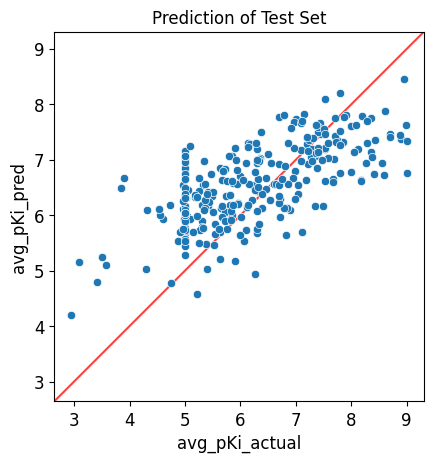

In [7]:
# Plots predicted vs actual values from a trained regression model for a given 
# dataframe
pp.plot_pred_vs_actual_from_df(pred_df, 
                               actual_col='avg_pKi_actual', 
                               pred_col='avg_pKi_pred', 
                               label='Prediction of Test Set');

In **tutorial 6** we will move beyond a single model and learn to optimize model hyperparameters by training many models.